## <center>🧠 <b>Face Recognition with FaceNet</b></center>

This notebook implements a **face recognition system** using the pretrained **FaceNet** model. It includes two main functionalities:

1. **Face Verification** (`verify`):  
   Given an input image and a claimed identity, the system checks whether the person in the image matches the claimed identity using **L2 distance** between face encodings.

2. **Face Recognition** (`who_is_it`):  
   Identifies the person in a new image by comparing its face encoding with all known encodings in the **database** and returns the closest match. If the minimum distance exceeds a predefined threshold (e.g., `0.7`), the person is considered **unknown**.

The embeddings are generated using a **pretrained FaceNet model**, and the comparison is based on **Euclidean distance** in the embedding space.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import model_from_json

In [2]:
json_file = open('keras-facenet-h5/model.json', 'r')
loaded_json = json_file.read()
json_file.close()

model = model_from_json(loaded_json)
model.load_weights('keras-facenet-h5/model.h5')

TypeError: Could not locate class 'Functional'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'class_name': 'Functional', 'config': {'name': 'inception_resnet_v1', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 160, 160, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}, 'name': 'input_1', 'inbound_nodes': []}, {'class_name': 'Conv2D', 'config': {'name': 'Conv2d_1a_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Conv2d_1a_3x3', 'inbound_nodes': [[['input_1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Conv2d_1a_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Conv2d_1a_3x3_BatchNorm', 'inbound_nodes': [[['Conv2d_1a_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Conv2d_1a_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Conv2d_1a_3x3_Activation', 'inbound_nodes': [[['Conv2d_1a_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Conv2d_2a_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Conv2d_2a_3x3', 'inbound_nodes': [[['Conv2d_1a_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Conv2d_2a_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Conv2d_2a_3x3_BatchNorm', 'inbound_nodes': [[['Conv2d_2a_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Conv2d_2a_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Conv2d_2a_3x3_Activation', 'inbound_nodes': [[['Conv2d_2a_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Conv2d_2b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Conv2d_2b_3x3', 'inbound_nodes': [[['Conv2d_2a_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Conv2d_2b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Conv2d_2b_3x3_BatchNorm', 'inbound_nodes': [[['Conv2d_2b_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Conv2d_2b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Conv2d_2b_3x3_Activation', 'inbound_nodes': [[['Conv2d_2b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'MaxPooling2D', 'config': {'name': 'MaxPool_3a_3x3', 'trainable': True, 'dtype': 'float32', 'pool_size': [3, 3], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'name': 'MaxPool_3a_3x3', 'inbound_nodes': [[['Conv2d_2b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Conv2d_3b_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 80, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Conv2d_3b_1x1', 'inbound_nodes': [[['MaxPool_3a_3x3', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Conv2d_3b_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Conv2d_3b_1x1_BatchNorm', 'inbound_nodes': [[['Conv2d_3b_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Conv2d_3b_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Conv2d_3b_1x1_Activation', 'inbound_nodes': [[['Conv2d_3b_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Conv2d_4a_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Conv2d_4a_3x3', 'inbound_nodes': [[['Conv2d_3b_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Conv2d_4a_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Conv2d_4a_3x3_BatchNorm', 'inbound_nodes': [[['Conv2d_4a_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Conv2d_4a_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Conv2d_4a_3x3_Activation', 'inbound_nodes': [[['Conv2d_4a_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Conv2d_4b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Conv2d_4b_3x3', 'inbound_nodes': [[['Conv2d_4a_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Conv2d_4b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Conv2d_4b_3x3_BatchNorm', 'inbound_nodes': [[['Conv2d_4b_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Conv2d_4b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Conv2d_4b_3x3_Activation', 'inbound_nodes': [[['Conv2d_4b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_1_Branch_2_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_1_Branch_2_Conv2d_0a_1x1', 'inbound_nodes': [[['Conv2d_4b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block35_1_Branch_2_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_1_Branch_2_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_1_Branch_2_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_1_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_1_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Conv2d_4b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_1_Branch_2_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_1_Branch_2_Conv2d_0b_3x3', 'inbound_nodes': [[['Block35_1_Branch_2_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block35_1_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Block35_1_Branch_2_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_1_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_1_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_1_Branch_2_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_1_Branch_2_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_1_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_1_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Conv2d_4b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_1_Branch_1_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_1_Branch_1_Conv2d_0b_3x3', 'inbound_nodes': [[['Block35_1_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_1_Branch_2_Conv2d_0c_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_1_Branch_2_Conv2d_0c_3x3', 'inbound_nodes': [[['Block35_1_Branch_2_Conv2d_0b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_1_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_1_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block35_1_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_1_Branch_1_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_1_Branch_1_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Block35_1_Branch_1_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_1_Branch_2_Conv2d_0c_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_1_Branch_2_Conv2d_0c_3x3_BatchNorm', 'inbound_nodes': [[['Block35_1_Branch_2_Conv2d_0c_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_1_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_1_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block35_1_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_1_Branch_1_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_1_Branch_1_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Block35_1_Branch_1_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_1_Branch_2_Conv2d_0c_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_1_Branch_2_Conv2d_0c_3x3_Activation', 'inbound_nodes': [[['Block35_1_Branch_2_Conv2d_0c_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block35_1_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block35_1_Concatenate', 'inbound_nodes': [[['Block35_1_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block35_1_Branch_1_Conv2d_0b_3x3_Activation', 0, 0, {}], ['Block35_1_Branch_2_Conv2d_0c_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_1_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_1_Conv2d_1x1', 'inbound_nodes': [[['Block35_1_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block35_1_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [17, 17, 256], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.17}}, 'name': 'Block35_1_ScaleSum', 'inbound_nodes': [[['Conv2d_4b_3x3_Activation', 0, 0, {}], ['Block35_1_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_1_Activation', 'inbound_nodes': [[['Block35_1_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_2_Branch_2_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_2_Branch_2_Conv2d_0a_1x1', 'inbound_nodes': [[['Block35_1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_2_Branch_2_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_2_Branch_2_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block35_2_Branch_2_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_2_Branch_2_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_2_Branch_2_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block35_2_Branch_2_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_2_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_2_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block35_1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_2_Branch_2_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_2_Branch_2_Conv2d_0b_3x3', 'inbound_nodes': [[['Block35_2_Branch_2_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_2_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_2_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block35_2_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_2_Branch_2_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_2_Branch_2_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Block35_2_Branch_2_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_2_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_2_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block35_2_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_2_Branch_2_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_2_Branch_2_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Block35_2_Branch_2_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_2_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_2_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block35_1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_2_Branch_1_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_2_Branch_1_Conv2d_0b_3x3', 'inbound_nodes': [[['Block35_2_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_2_Branch_2_Conv2d_0c_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_2_Branch_2_Conv2d_0c_3x3', 'inbound_nodes': [[['Block35_2_Branch_2_Conv2d_0b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_2_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_2_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block35_2_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_2_Branch_1_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_2_Branch_1_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Block35_2_Branch_1_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_2_Branch_2_Conv2d_0c_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_2_Branch_2_Conv2d_0c_3x3_BatchNorm', 'inbound_nodes': [[['Block35_2_Branch_2_Conv2d_0c_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_2_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_2_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block35_2_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_2_Branch_1_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_2_Branch_1_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Block35_2_Branch_1_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_2_Branch_2_Conv2d_0c_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_2_Branch_2_Conv2d_0c_3x3_Activation', 'inbound_nodes': [[['Block35_2_Branch_2_Conv2d_0c_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block35_2_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block35_2_Concatenate', 'inbound_nodes': [[['Block35_2_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block35_2_Branch_1_Conv2d_0b_3x3_Activation', 0, 0, {}], ['Block35_2_Branch_2_Conv2d_0c_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_2_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_2_Conv2d_1x1', 'inbound_nodes': [[['Block35_2_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block35_2_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [17, 17, 256], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.17}}, 'name': 'Block35_2_ScaleSum', 'inbound_nodes': [[['Block35_1_Activation', 0, 0, {}], ['Block35_2_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_2_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_2_Activation', 'inbound_nodes': [[['Block35_2_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_3_Branch_2_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_3_Branch_2_Conv2d_0a_1x1', 'inbound_nodes': [[['Block35_2_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_3_Branch_2_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_3_Branch_2_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block35_3_Branch_2_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_3_Branch_2_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_3_Branch_2_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block35_3_Branch_2_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_3_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_3_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block35_2_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_3_Branch_2_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_3_Branch_2_Conv2d_0b_3x3', 'inbound_nodes': [[['Block35_3_Branch_2_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_3_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_3_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block35_3_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_3_Branch_2_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_3_Branch_2_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Block35_3_Branch_2_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_3_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_3_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block35_3_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_3_Branch_2_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_3_Branch_2_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Block35_3_Branch_2_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_3_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_3_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block35_2_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_3_Branch_1_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_3_Branch_1_Conv2d_0b_3x3', 'inbound_nodes': [[['Block35_3_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_3_Branch_2_Conv2d_0c_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_3_Branch_2_Conv2d_0c_3x3', 'inbound_nodes': [[['Block35_3_Branch_2_Conv2d_0b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_3_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_3_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block35_3_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_3_Branch_1_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_3_Branch_1_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Block35_3_Branch_1_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_3_Branch_2_Conv2d_0c_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_3_Branch_2_Conv2d_0c_3x3_BatchNorm', 'inbound_nodes': [[['Block35_3_Branch_2_Conv2d_0c_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_3_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_3_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block35_3_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_3_Branch_1_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_3_Branch_1_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Block35_3_Branch_1_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_3_Branch_2_Conv2d_0c_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_3_Branch_2_Conv2d_0c_3x3_Activation', 'inbound_nodes': [[['Block35_3_Branch_2_Conv2d_0c_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block35_3_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block35_3_Concatenate', 'inbound_nodes': [[['Block35_3_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block35_3_Branch_1_Conv2d_0b_3x3_Activation', 0, 0, {}], ['Block35_3_Branch_2_Conv2d_0c_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_3_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_3_Conv2d_1x1', 'inbound_nodes': [[['Block35_3_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block35_3_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [17, 17, 256], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.17}}, 'name': 'Block35_3_ScaleSum', 'inbound_nodes': [[['Block35_2_Activation', 0, 0, {}], ['Block35_3_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_3_Activation', 'inbound_nodes': [[['Block35_3_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_4_Branch_2_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_4_Branch_2_Conv2d_0a_1x1', 'inbound_nodes': [[['Block35_3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_4_Branch_2_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_4_Branch_2_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block35_4_Branch_2_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_4_Branch_2_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_4_Branch_2_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block35_4_Branch_2_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_4_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_4_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block35_3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_4_Branch_2_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_4_Branch_2_Conv2d_0b_3x3', 'inbound_nodes': [[['Block35_4_Branch_2_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_4_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_4_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block35_4_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_4_Branch_2_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_4_Branch_2_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Block35_4_Branch_2_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_4_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_4_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block35_4_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_4_Branch_2_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_4_Branch_2_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Block35_4_Branch_2_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_4_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_4_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block35_3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_4_Branch_1_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_4_Branch_1_Conv2d_0b_3x3', 'inbound_nodes': [[['Block35_4_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_4_Branch_2_Conv2d_0c_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_4_Branch_2_Conv2d_0c_3x3', 'inbound_nodes': [[['Block35_4_Branch_2_Conv2d_0b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_4_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_4_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block35_4_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_4_Branch_1_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_4_Branch_1_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Block35_4_Branch_1_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_4_Branch_2_Conv2d_0c_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_4_Branch_2_Conv2d_0c_3x3_BatchNorm', 'inbound_nodes': [[['Block35_4_Branch_2_Conv2d_0c_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_4_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_4_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block35_4_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_4_Branch_1_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_4_Branch_1_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Block35_4_Branch_1_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_4_Branch_2_Conv2d_0c_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_4_Branch_2_Conv2d_0c_3x3_Activation', 'inbound_nodes': [[['Block35_4_Branch_2_Conv2d_0c_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block35_4_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block35_4_Concatenate', 'inbound_nodes': [[['Block35_4_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block35_4_Branch_1_Conv2d_0b_3x3_Activation', 0, 0, {}], ['Block35_4_Branch_2_Conv2d_0c_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_4_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_4_Conv2d_1x1', 'inbound_nodes': [[['Block35_4_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block35_4_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [17, 17, 256], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.17}}, 'name': 'Block35_4_ScaleSum', 'inbound_nodes': [[['Block35_3_Activation', 0, 0, {}], ['Block35_4_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_4_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_4_Activation', 'inbound_nodes': [[['Block35_4_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_5_Branch_2_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_5_Branch_2_Conv2d_0a_1x1', 'inbound_nodes': [[['Block35_4_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_5_Branch_2_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_5_Branch_2_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block35_5_Branch_2_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_5_Branch_2_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_5_Branch_2_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block35_5_Branch_2_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_5_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_5_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block35_4_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_5_Branch_2_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_5_Branch_2_Conv2d_0b_3x3', 'inbound_nodes': [[['Block35_5_Branch_2_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_5_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_5_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block35_5_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_5_Branch_2_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_5_Branch_2_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Block35_5_Branch_2_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_5_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_5_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block35_5_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_5_Branch_2_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_5_Branch_2_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Block35_5_Branch_2_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_5_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_5_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block35_4_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_5_Branch_1_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_5_Branch_1_Conv2d_0b_3x3', 'inbound_nodes': [[['Block35_5_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_5_Branch_2_Conv2d_0c_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_5_Branch_2_Conv2d_0c_3x3', 'inbound_nodes': [[['Block35_5_Branch_2_Conv2d_0b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_5_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_5_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block35_5_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_5_Branch_1_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_5_Branch_1_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Block35_5_Branch_1_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block35_5_Branch_2_Conv2d_0c_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block35_5_Branch_2_Conv2d_0c_3x3_BatchNorm', 'inbound_nodes': [[['Block35_5_Branch_2_Conv2d_0c_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_5_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_5_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block35_5_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_5_Branch_1_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_5_Branch_1_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Block35_5_Branch_1_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_5_Branch_2_Conv2d_0c_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_5_Branch_2_Conv2d_0c_3x3_Activation', 'inbound_nodes': [[['Block35_5_Branch_2_Conv2d_0c_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block35_5_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block35_5_Concatenate', 'inbound_nodes': [[['Block35_5_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block35_5_Branch_1_Conv2d_0b_3x3_Activation', 0, 0, {}], ['Block35_5_Branch_2_Conv2d_0c_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block35_5_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block35_5_Conv2d_1x1', 'inbound_nodes': [[['Block35_5_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block35_5_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [17, 17, 256], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.17}}, 'name': 'Block35_5_ScaleSum', 'inbound_nodes': [[['Block35_4_Activation', 0, 0, {}], ['Block35_5_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block35_5_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block35_5_Activation', 'inbound_nodes': [[['Block35_5_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_6a_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_6a_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block35_5_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_6a_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_6a_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Mixed_6a_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_6a_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_6a_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Mixed_6a_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_6a_Branch_1_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_6a_Branch_1_Conv2d_0b_3x3', 'inbound_nodes': [[['Mixed_6a_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_6a_Branch_1_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_6a_Branch_1_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Mixed_6a_Branch_1_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_6a_Branch_1_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_6a_Branch_1_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Mixed_6a_Branch_1_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_6a_Branch_0_Conv2d_1a_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 384, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_6a_Branch_0_Conv2d_1a_3x3', 'inbound_nodes': [[['Block35_5_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_6a_Branch_1_Conv2d_1a_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_6a_Branch_1_Conv2d_1a_3x3', 'inbound_nodes': [[['Mixed_6a_Branch_1_Conv2d_0b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_6a_Branch_0_Conv2d_1a_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_6a_Branch_0_Conv2d_1a_3x3_BatchNorm', 'inbound_nodes': [[['Mixed_6a_Branch_0_Conv2d_1a_3x3', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_6a_Branch_1_Conv2d_1a_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_6a_Branch_1_Conv2d_1a_3x3_BatchNorm', 'inbound_nodes': [[['Mixed_6a_Branch_1_Conv2d_1a_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_6a_Branch_0_Conv2d_1a_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_6a_Branch_0_Conv2d_1a_3x3_Activation', 'inbound_nodes': [[['Mixed_6a_Branch_0_Conv2d_1a_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_6a_Branch_1_Conv2d_1a_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_6a_Branch_1_Conv2d_1a_3x3_Activation', 'inbound_nodes': [[['Mixed_6a_Branch_1_Conv2d_1a_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'MaxPooling2D', 'config': {'name': 'Mixed_6a_Branch_2_MaxPool_1a_3x3', 'trainable': True, 'dtype': 'float32', 'pool_size': [3, 3], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'name': 'Mixed_6a_Branch_2_MaxPool_1a_3x3', 'inbound_nodes': [[['Block35_5_Activation', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Mixed_6a', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Mixed_6a', 'inbound_nodes': [[['Mixed_6a_Branch_0_Conv2d_1a_3x3_Activation', 0, 0, {}], ['Mixed_6a_Branch_1_Conv2d_1a_3x3_Activation', 0, 0, {}], ['Mixed_6a_Branch_2_MaxPool_1a_3x3', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_1_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_1_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Mixed_6a', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_1_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_1_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block17_1_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_1_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_1_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block17_1_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_1_Branch_1_Conv2d_0b_1x7', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 7], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_1_Branch_1_Conv2d_0b_1x7', 'inbound_nodes': [[['Block17_1_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_1_Branch_1_Conv2d_0b_1x7_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_1_Branch_1_Conv2d_0b_1x7_BatchNorm', 'inbound_nodes': [[['Block17_1_Branch_1_Conv2d_0b_1x7', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_1_Branch_1_Conv2d_0b_1x7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_1_Branch_1_Conv2d_0b_1x7_Activation', 'inbound_nodes': [[['Block17_1_Branch_1_Conv2d_0b_1x7_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_1_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_1_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Mixed_6a', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_1_Branch_1_Conv2d_0c_7x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [7, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_1_Branch_1_Conv2d_0c_7x1', 'inbound_nodes': [[['Block17_1_Branch_1_Conv2d_0b_1x7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_1_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_1_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block17_1_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_1_Branch_1_Conv2d_0c_7x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_1_Branch_1_Conv2d_0c_7x1_BatchNorm', 'inbound_nodes': [[['Block17_1_Branch_1_Conv2d_0c_7x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_1_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_1_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block17_1_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_1_Branch_1_Conv2d_0c_7x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_1_Branch_1_Conv2d_0c_7x1_Activation', 'inbound_nodes': [[['Block17_1_Branch_1_Conv2d_0c_7x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block17_1_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block17_1_Concatenate', 'inbound_nodes': [[['Block17_1_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block17_1_Branch_1_Conv2d_0c_7x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_1_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 896, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_1_Conv2d_1x1', 'inbound_nodes': [[['Block17_1_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block17_1_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [8, 8, 896], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.1}}, 'name': 'Block17_1_ScaleSum', 'inbound_nodes': [[['Mixed_6a', 0, 0, {}], ['Block17_1_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_1_Activation', 'inbound_nodes': [[['Block17_1_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_2_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_2_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_2_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_2_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block17_2_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_2_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_2_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block17_2_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_2_Branch_1_Conv2d_0b_1x7', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 7], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_2_Branch_1_Conv2d_0b_1x7', 'inbound_nodes': [[['Block17_2_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_2_Branch_1_Conv2d_0b_1x7_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_2_Branch_1_Conv2d_0b_1x7_BatchNorm', 'inbound_nodes': [[['Block17_2_Branch_1_Conv2d_0b_1x7', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_2_Branch_1_Conv2d_0b_1x7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_2_Branch_1_Conv2d_0b_1x7_Activation', 'inbound_nodes': [[['Block17_2_Branch_1_Conv2d_0b_1x7_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_2_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_2_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block17_1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_2_Branch_1_Conv2d_0c_7x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [7, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_2_Branch_1_Conv2d_0c_7x1', 'inbound_nodes': [[['Block17_2_Branch_1_Conv2d_0b_1x7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_2_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_2_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block17_2_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_2_Branch_1_Conv2d_0c_7x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_2_Branch_1_Conv2d_0c_7x1_BatchNorm', 'inbound_nodes': [[['Block17_2_Branch_1_Conv2d_0c_7x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_2_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_2_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block17_2_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_2_Branch_1_Conv2d_0c_7x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_2_Branch_1_Conv2d_0c_7x1_Activation', 'inbound_nodes': [[['Block17_2_Branch_1_Conv2d_0c_7x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block17_2_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block17_2_Concatenate', 'inbound_nodes': [[['Block17_2_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block17_2_Branch_1_Conv2d_0c_7x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_2_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 896, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_2_Conv2d_1x1', 'inbound_nodes': [[['Block17_2_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block17_2_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [8, 8, 896], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.1}}, 'name': 'Block17_2_ScaleSum', 'inbound_nodes': [[['Block17_1_Activation', 0, 0, {}], ['Block17_2_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_2_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_2_Activation', 'inbound_nodes': [[['Block17_2_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_3_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_3_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_2_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_3_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_3_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block17_3_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_3_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_3_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block17_3_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_3_Branch_1_Conv2d_0b_1x7', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 7], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_3_Branch_1_Conv2d_0b_1x7', 'inbound_nodes': [[['Block17_3_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_3_Branch_1_Conv2d_0b_1x7_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_3_Branch_1_Conv2d_0b_1x7_BatchNorm', 'inbound_nodes': [[['Block17_3_Branch_1_Conv2d_0b_1x7', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_3_Branch_1_Conv2d_0b_1x7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_3_Branch_1_Conv2d_0b_1x7_Activation', 'inbound_nodes': [[['Block17_3_Branch_1_Conv2d_0b_1x7_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_3_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_3_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block17_2_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_3_Branch_1_Conv2d_0c_7x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [7, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_3_Branch_1_Conv2d_0c_7x1', 'inbound_nodes': [[['Block17_3_Branch_1_Conv2d_0b_1x7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_3_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_3_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block17_3_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_3_Branch_1_Conv2d_0c_7x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_3_Branch_1_Conv2d_0c_7x1_BatchNorm', 'inbound_nodes': [[['Block17_3_Branch_1_Conv2d_0c_7x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_3_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_3_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block17_3_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_3_Branch_1_Conv2d_0c_7x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_3_Branch_1_Conv2d_0c_7x1_Activation', 'inbound_nodes': [[['Block17_3_Branch_1_Conv2d_0c_7x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block17_3_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block17_3_Concatenate', 'inbound_nodes': [[['Block17_3_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block17_3_Branch_1_Conv2d_0c_7x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_3_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 896, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_3_Conv2d_1x1', 'inbound_nodes': [[['Block17_3_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block17_3_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [8, 8, 896], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.1}}, 'name': 'Block17_3_ScaleSum', 'inbound_nodes': [[['Block17_2_Activation', 0, 0, {}], ['Block17_3_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_3_Activation', 'inbound_nodes': [[['Block17_3_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_4_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_4_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_4_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_4_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block17_4_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_4_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_4_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block17_4_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_4_Branch_1_Conv2d_0b_1x7', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 7], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_4_Branch_1_Conv2d_0b_1x7', 'inbound_nodes': [[['Block17_4_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_4_Branch_1_Conv2d_0b_1x7_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_4_Branch_1_Conv2d_0b_1x7_BatchNorm', 'inbound_nodes': [[['Block17_4_Branch_1_Conv2d_0b_1x7', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_4_Branch_1_Conv2d_0b_1x7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_4_Branch_1_Conv2d_0b_1x7_Activation', 'inbound_nodes': [[['Block17_4_Branch_1_Conv2d_0b_1x7_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_4_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_4_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block17_3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_4_Branch_1_Conv2d_0c_7x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [7, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_4_Branch_1_Conv2d_0c_7x1', 'inbound_nodes': [[['Block17_4_Branch_1_Conv2d_0b_1x7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_4_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_4_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block17_4_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_4_Branch_1_Conv2d_0c_7x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_4_Branch_1_Conv2d_0c_7x1_BatchNorm', 'inbound_nodes': [[['Block17_4_Branch_1_Conv2d_0c_7x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_4_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_4_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block17_4_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_4_Branch_1_Conv2d_0c_7x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_4_Branch_1_Conv2d_0c_7x1_Activation', 'inbound_nodes': [[['Block17_4_Branch_1_Conv2d_0c_7x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block17_4_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block17_4_Concatenate', 'inbound_nodes': [[['Block17_4_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block17_4_Branch_1_Conv2d_0c_7x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_4_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 896, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_4_Conv2d_1x1', 'inbound_nodes': [[['Block17_4_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block17_4_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [8, 8, 896], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.1}}, 'name': 'Block17_4_ScaleSum', 'inbound_nodes': [[['Block17_3_Activation', 0, 0, {}], ['Block17_4_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_4_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_4_Activation', 'inbound_nodes': [[['Block17_4_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_5_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_5_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_4_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_5_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_5_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block17_5_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_5_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_5_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block17_5_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_5_Branch_1_Conv2d_0b_1x7', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 7], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_5_Branch_1_Conv2d_0b_1x7', 'inbound_nodes': [[['Block17_5_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_5_Branch_1_Conv2d_0b_1x7_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_5_Branch_1_Conv2d_0b_1x7_BatchNorm', 'inbound_nodes': [[['Block17_5_Branch_1_Conv2d_0b_1x7', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_5_Branch_1_Conv2d_0b_1x7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_5_Branch_1_Conv2d_0b_1x7_Activation', 'inbound_nodes': [[['Block17_5_Branch_1_Conv2d_0b_1x7_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_5_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_5_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block17_4_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_5_Branch_1_Conv2d_0c_7x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [7, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_5_Branch_1_Conv2d_0c_7x1', 'inbound_nodes': [[['Block17_5_Branch_1_Conv2d_0b_1x7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_5_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_5_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block17_5_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_5_Branch_1_Conv2d_0c_7x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_5_Branch_1_Conv2d_0c_7x1_BatchNorm', 'inbound_nodes': [[['Block17_5_Branch_1_Conv2d_0c_7x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_5_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_5_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block17_5_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_5_Branch_1_Conv2d_0c_7x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_5_Branch_1_Conv2d_0c_7x1_Activation', 'inbound_nodes': [[['Block17_5_Branch_1_Conv2d_0c_7x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block17_5_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block17_5_Concatenate', 'inbound_nodes': [[['Block17_5_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block17_5_Branch_1_Conv2d_0c_7x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_5_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 896, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_5_Conv2d_1x1', 'inbound_nodes': [[['Block17_5_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block17_5_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [8, 8, 896], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.1}}, 'name': 'Block17_5_ScaleSum', 'inbound_nodes': [[['Block17_4_Activation', 0, 0, {}], ['Block17_5_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_5_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_5_Activation', 'inbound_nodes': [[['Block17_5_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_6_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_6_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_5_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_6_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_6_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block17_6_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_6_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_6_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block17_6_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_6_Branch_1_Conv2d_0b_1x7', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 7], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_6_Branch_1_Conv2d_0b_1x7', 'inbound_nodes': [[['Block17_6_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_6_Branch_1_Conv2d_0b_1x7_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_6_Branch_1_Conv2d_0b_1x7_BatchNorm', 'inbound_nodes': [[['Block17_6_Branch_1_Conv2d_0b_1x7', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_6_Branch_1_Conv2d_0b_1x7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_6_Branch_1_Conv2d_0b_1x7_Activation', 'inbound_nodes': [[['Block17_6_Branch_1_Conv2d_0b_1x7_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_6_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_6_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block17_5_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_6_Branch_1_Conv2d_0c_7x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [7, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_6_Branch_1_Conv2d_0c_7x1', 'inbound_nodes': [[['Block17_6_Branch_1_Conv2d_0b_1x7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_6_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_6_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block17_6_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_6_Branch_1_Conv2d_0c_7x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_6_Branch_1_Conv2d_0c_7x1_BatchNorm', 'inbound_nodes': [[['Block17_6_Branch_1_Conv2d_0c_7x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_6_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_6_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block17_6_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_6_Branch_1_Conv2d_0c_7x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_6_Branch_1_Conv2d_0c_7x1_Activation', 'inbound_nodes': [[['Block17_6_Branch_1_Conv2d_0c_7x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block17_6_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block17_6_Concatenate', 'inbound_nodes': [[['Block17_6_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block17_6_Branch_1_Conv2d_0c_7x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_6_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 896, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_6_Conv2d_1x1', 'inbound_nodes': [[['Block17_6_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block17_6_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [8, 8, 896], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.1}}, 'name': 'Block17_6_ScaleSum', 'inbound_nodes': [[['Block17_5_Activation', 0, 0, {}], ['Block17_6_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_6_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_6_Activation', 'inbound_nodes': [[['Block17_6_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_7_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_7_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_6_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_7_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_7_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block17_7_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_7_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_7_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block17_7_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_7_Branch_1_Conv2d_0b_1x7', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 7], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_7_Branch_1_Conv2d_0b_1x7', 'inbound_nodes': [[['Block17_7_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_7_Branch_1_Conv2d_0b_1x7_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_7_Branch_1_Conv2d_0b_1x7_BatchNorm', 'inbound_nodes': [[['Block17_7_Branch_1_Conv2d_0b_1x7', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_7_Branch_1_Conv2d_0b_1x7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_7_Branch_1_Conv2d_0b_1x7_Activation', 'inbound_nodes': [[['Block17_7_Branch_1_Conv2d_0b_1x7_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_7_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_7_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block17_6_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_7_Branch_1_Conv2d_0c_7x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [7, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_7_Branch_1_Conv2d_0c_7x1', 'inbound_nodes': [[['Block17_7_Branch_1_Conv2d_0b_1x7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_7_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_7_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block17_7_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_7_Branch_1_Conv2d_0c_7x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_7_Branch_1_Conv2d_0c_7x1_BatchNorm', 'inbound_nodes': [[['Block17_7_Branch_1_Conv2d_0c_7x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_7_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_7_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block17_7_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_7_Branch_1_Conv2d_0c_7x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_7_Branch_1_Conv2d_0c_7x1_Activation', 'inbound_nodes': [[['Block17_7_Branch_1_Conv2d_0c_7x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block17_7_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block17_7_Concatenate', 'inbound_nodes': [[['Block17_7_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block17_7_Branch_1_Conv2d_0c_7x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_7_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 896, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_7_Conv2d_1x1', 'inbound_nodes': [[['Block17_7_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block17_7_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [8, 8, 896], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.1}}, 'name': 'Block17_7_ScaleSum', 'inbound_nodes': [[['Block17_6_Activation', 0, 0, {}], ['Block17_7_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_7_Activation', 'inbound_nodes': [[['Block17_7_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_8_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_8_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_8_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_8_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block17_8_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_8_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_8_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block17_8_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_8_Branch_1_Conv2d_0b_1x7', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 7], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_8_Branch_1_Conv2d_0b_1x7', 'inbound_nodes': [[['Block17_8_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_8_Branch_1_Conv2d_0b_1x7_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_8_Branch_1_Conv2d_0b_1x7_BatchNorm', 'inbound_nodes': [[['Block17_8_Branch_1_Conv2d_0b_1x7', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_8_Branch_1_Conv2d_0b_1x7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_8_Branch_1_Conv2d_0b_1x7_Activation', 'inbound_nodes': [[['Block17_8_Branch_1_Conv2d_0b_1x7_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_8_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_8_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block17_7_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_8_Branch_1_Conv2d_0c_7x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [7, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_8_Branch_1_Conv2d_0c_7x1', 'inbound_nodes': [[['Block17_8_Branch_1_Conv2d_0b_1x7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_8_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_8_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block17_8_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_8_Branch_1_Conv2d_0c_7x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_8_Branch_1_Conv2d_0c_7x1_BatchNorm', 'inbound_nodes': [[['Block17_8_Branch_1_Conv2d_0c_7x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_8_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_8_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block17_8_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_8_Branch_1_Conv2d_0c_7x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_8_Branch_1_Conv2d_0c_7x1_Activation', 'inbound_nodes': [[['Block17_8_Branch_1_Conv2d_0c_7x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block17_8_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block17_8_Concatenate', 'inbound_nodes': [[['Block17_8_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block17_8_Branch_1_Conv2d_0c_7x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_8_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 896, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_8_Conv2d_1x1', 'inbound_nodes': [[['Block17_8_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block17_8_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [8, 8, 896], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.1}}, 'name': 'Block17_8_ScaleSum', 'inbound_nodes': [[['Block17_7_Activation', 0, 0, {}], ['Block17_8_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_8_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_8_Activation', 'inbound_nodes': [[['Block17_8_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_9_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_9_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_8_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_9_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_9_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block17_9_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_9_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_9_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block17_9_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_9_Branch_1_Conv2d_0b_1x7', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 7], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_9_Branch_1_Conv2d_0b_1x7', 'inbound_nodes': [[['Block17_9_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_9_Branch_1_Conv2d_0b_1x7_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_9_Branch_1_Conv2d_0b_1x7_BatchNorm', 'inbound_nodes': [[['Block17_9_Branch_1_Conv2d_0b_1x7', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_9_Branch_1_Conv2d_0b_1x7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_9_Branch_1_Conv2d_0b_1x7_Activation', 'inbound_nodes': [[['Block17_9_Branch_1_Conv2d_0b_1x7_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_9_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_9_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block17_8_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_9_Branch_1_Conv2d_0c_7x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [7, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_9_Branch_1_Conv2d_0c_7x1', 'inbound_nodes': [[['Block17_9_Branch_1_Conv2d_0b_1x7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_9_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_9_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block17_9_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_9_Branch_1_Conv2d_0c_7x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_9_Branch_1_Conv2d_0c_7x1_BatchNorm', 'inbound_nodes': [[['Block17_9_Branch_1_Conv2d_0c_7x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_9_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_9_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block17_9_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_9_Branch_1_Conv2d_0c_7x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_9_Branch_1_Conv2d_0c_7x1_Activation', 'inbound_nodes': [[['Block17_9_Branch_1_Conv2d_0c_7x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block17_9_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block17_9_Concatenate', 'inbound_nodes': [[['Block17_9_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block17_9_Branch_1_Conv2d_0c_7x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_9_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 896, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_9_Conv2d_1x1', 'inbound_nodes': [[['Block17_9_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block17_9_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [8, 8, 896], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.1}}, 'name': 'Block17_9_ScaleSum', 'inbound_nodes': [[['Block17_8_Activation', 0, 0, {}], ['Block17_9_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_9_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_9_Activation', 'inbound_nodes': [[['Block17_9_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_10_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_10_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_9_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_10_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_10_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block17_10_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_10_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_10_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block17_10_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_10_Branch_1_Conv2d_0b_1x7', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 7], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_10_Branch_1_Conv2d_0b_1x7', 'inbound_nodes': [[['Block17_10_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_10_Branch_1_Conv2d_0b_1x7_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_10_Branch_1_Conv2d_0b_1x7_BatchNorm', 'inbound_nodes': [[['Block17_10_Branch_1_Conv2d_0b_1x7', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_10_Branch_1_Conv2d_0b_1x7_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_10_Branch_1_Conv2d_0b_1x7_Activation', 'inbound_nodes': [[['Block17_10_Branch_1_Conv2d_0b_1x7_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_10_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_10_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block17_9_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_10_Branch_1_Conv2d_0c_7x1', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [7, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_10_Branch_1_Conv2d_0c_7x1', 'inbound_nodes': [[['Block17_10_Branch_1_Conv2d_0b_1x7_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_10_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_10_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block17_10_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block17_10_Branch_1_Conv2d_0c_7x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block17_10_Branch_1_Conv2d_0c_7x1_BatchNorm', 'inbound_nodes': [[['Block17_10_Branch_1_Conv2d_0c_7x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_10_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_10_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block17_10_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_10_Branch_1_Conv2d_0c_7x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_10_Branch_1_Conv2d_0c_7x1_Activation', 'inbound_nodes': [[['Block17_10_Branch_1_Conv2d_0c_7x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block17_10_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block17_10_Concatenate', 'inbound_nodes': [[['Block17_10_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block17_10_Branch_1_Conv2d_0c_7x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block17_10_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 896, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block17_10_Conv2d_1x1', 'inbound_nodes': [[['Block17_10_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block17_10_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [8, 8, 896], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.1}}, 'name': 'Block17_10_ScaleSum', 'inbound_nodes': [[['Block17_9_Activation', 0, 0, {}], ['Block17_10_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block17_10_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block17_10_Activation', 'inbound_nodes': [[['Block17_10_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_7a_Branch_2_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_7a_Branch_2_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_10_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_7a_Branch_2_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_7a_Branch_2_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Mixed_7a_Branch_2_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_7a_Branch_2_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_7a_Branch_2_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Mixed_7a_Branch_2_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_7a_Branch_0_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_7a_Branch_0_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_10_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_7a_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_7a_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block17_10_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_7a_Branch_2_Conv2d_0b_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_7a_Branch_2_Conv2d_0b_3x3', 'inbound_nodes': [[['Mixed_7a_Branch_2_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_7a_Branch_0_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_7a_Branch_0_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Mixed_7a_Branch_0_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_7a_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_7a_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Mixed_7a_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_7a_Branch_2_Conv2d_0b_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_7a_Branch_2_Conv2d_0b_3x3_BatchNorm', 'inbound_nodes': [[['Mixed_7a_Branch_2_Conv2d_0b_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_7a_Branch_0_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_7a_Branch_0_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Mixed_7a_Branch_0_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_7a_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_7a_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Mixed_7a_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_7a_Branch_2_Conv2d_0b_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_7a_Branch_2_Conv2d_0b_3x3_Activation', 'inbound_nodes': [[['Mixed_7a_Branch_2_Conv2d_0b_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_7a_Branch_0_Conv2d_1a_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 384, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_7a_Branch_0_Conv2d_1a_3x3', 'inbound_nodes': [[['Mixed_7a_Branch_0_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_7a_Branch_1_Conv2d_1a_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_7a_Branch_1_Conv2d_1a_3x3', 'inbound_nodes': [[['Mixed_7a_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Mixed_7a_Branch_2_Conv2d_1a_3x3', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Mixed_7a_Branch_2_Conv2d_1a_3x3', 'inbound_nodes': [[['Mixed_7a_Branch_2_Conv2d_0b_3x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_7a_Branch_0_Conv2d_1a_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_7a_Branch_0_Conv2d_1a_3x3_BatchNorm', 'inbound_nodes': [[['Mixed_7a_Branch_0_Conv2d_1a_3x3', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_7a_Branch_1_Conv2d_1a_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_7a_Branch_1_Conv2d_1a_3x3_BatchNorm', 'inbound_nodes': [[['Mixed_7a_Branch_1_Conv2d_1a_3x3', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Mixed_7a_Branch_2_Conv2d_1a_3x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Mixed_7a_Branch_2_Conv2d_1a_3x3_BatchNorm', 'inbound_nodes': [[['Mixed_7a_Branch_2_Conv2d_1a_3x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_7a_Branch_0_Conv2d_1a_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_7a_Branch_0_Conv2d_1a_3x3_Activation', 'inbound_nodes': [[['Mixed_7a_Branch_0_Conv2d_1a_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_7a_Branch_1_Conv2d_1a_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_7a_Branch_1_Conv2d_1a_3x3_Activation', 'inbound_nodes': [[['Mixed_7a_Branch_1_Conv2d_1a_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Mixed_7a_Branch_2_Conv2d_1a_3x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Mixed_7a_Branch_2_Conv2d_1a_3x3_Activation', 'inbound_nodes': [[['Mixed_7a_Branch_2_Conv2d_1a_3x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'MaxPooling2D', 'config': {'name': 'Mixed_7a_Branch_3_MaxPool_1a_3x3', 'trainable': True, 'dtype': 'float32', 'pool_size': [3, 3], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'name': 'Mixed_7a_Branch_3_MaxPool_1a_3x3', 'inbound_nodes': [[['Block17_10_Activation', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Mixed_7a', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Mixed_7a', 'inbound_nodes': [[['Mixed_7a_Branch_0_Conv2d_1a_3x3_Activation', 0, 0, {}], ['Mixed_7a_Branch_1_Conv2d_1a_3x3_Activation', 0, 0, {}], ['Mixed_7a_Branch_2_Conv2d_1a_3x3_Activation', 0, 0, {}], ['Mixed_7a_Branch_3_MaxPool_1a_3x3', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_1_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_1_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Mixed_7a', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_1_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_1_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block8_1_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_1_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_1_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block8_1_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_1_Branch_1_Conv2d_0b_1x3', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_1_Branch_1_Conv2d_0b_1x3', 'inbound_nodes': [[['Block8_1_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_1_Branch_1_Conv2d_0b_1x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_1_Branch_1_Conv2d_0b_1x3_BatchNorm', 'inbound_nodes': [[['Block8_1_Branch_1_Conv2d_0b_1x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_1_Branch_1_Conv2d_0b_1x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_1_Branch_1_Conv2d_0b_1x3_Activation', 'inbound_nodes': [[['Block8_1_Branch_1_Conv2d_0b_1x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_1_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_1_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Mixed_7a', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_1_Branch_1_Conv2d_0c_3x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [3, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_1_Branch_1_Conv2d_0c_3x1', 'inbound_nodes': [[['Block8_1_Branch_1_Conv2d_0b_1x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_1_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_1_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block8_1_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_1_Branch_1_Conv2d_0c_3x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_1_Branch_1_Conv2d_0c_3x1_BatchNorm', 'inbound_nodes': [[['Block8_1_Branch_1_Conv2d_0c_3x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_1_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_1_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block8_1_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_1_Branch_1_Conv2d_0c_3x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_1_Branch_1_Conv2d_0c_3x1_Activation', 'inbound_nodes': [[['Block8_1_Branch_1_Conv2d_0c_3x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block8_1_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block8_1_Concatenate', 'inbound_nodes': [[['Block8_1_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block8_1_Branch_1_Conv2d_0c_3x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_1_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 1792, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_1_Conv2d_1x1', 'inbound_nodes': [[['Block8_1_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block8_1_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [3, 3, 1792], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.2}}, 'name': 'Block8_1_ScaleSum', 'inbound_nodes': [[['Mixed_7a', 0, 0, {}], ['Block8_1_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_1_Activation', 'inbound_nodes': [[['Block8_1_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_2_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_2_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block8_1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_2_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_2_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block8_2_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_2_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_2_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block8_2_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_2_Branch_1_Conv2d_0b_1x3', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_2_Branch_1_Conv2d_0b_1x3', 'inbound_nodes': [[['Block8_2_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_2_Branch_1_Conv2d_0b_1x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_2_Branch_1_Conv2d_0b_1x3_BatchNorm', 'inbound_nodes': [[['Block8_2_Branch_1_Conv2d_0b_1x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_2_Branch_1_Conv2d_0b_1x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_2_Branch_1_Conv2d_0b_1x3_Activation', 'inbound_nodes': [[['Block8_2_Branch_1_Conv2d_0b_1x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_2_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_2_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block8_1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_2_Branch_1_Conv2d_0c_3x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [3, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_2_Branch_1_Conv2d_0c_3x1', 'inbound_nodes': [[['Block8_2_Branch_1_Conv2d_0b_1x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_2_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_2_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block8_2_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_2_Branch_1_Conv2d_0c_3x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_2_Branch_1_Conv2d_0c_3x1_BatchNorm', 'inbound_nodes': [[['Block8_2_Branch_1_Conv2d_0c_3x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_2_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_2_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block8_2_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_2_Branch_1_Conv2d_0c_3x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_2_Branch_1_Conv2d_0c_3x1_Activation', 'inbound_nodes': [[['Block8_2_Branch_1_Conv2d_0c_3x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block8_2_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block8_2_Concatenate', 'inbound_nodes': [[['Block8_2_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block8_2_Branch_1_Conv2d_0c_3x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_2_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 1792, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_2_Conv2d_1x1', 'inbound_nodes': [[['Block8_2_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block8_2_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [3, 3, 1792], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.2}}, 'name': 'Block8_2_ScaleSum', 'inbound_nodes': [[['Block8_1_Activation', 0, 0, {}], ['Block8_2_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_2_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_2_Activation', 'inbound_nodes': [[['Block8_2_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_3_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_3_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block8_2_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_3_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_3_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block8_3_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_3_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_3_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block8_3_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_3_Branch_1_Conv2d_0b_1x3', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_3_Branch_1_Conv2d_0b_1x3', 'inbound_nodes': [[['Block8_3_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_3_Branch_1_Conv2d_0b_1x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_3_Branch_1_Conv2d_0b_1x3_BatchNorm', 'inbound_nodes': [[['Block8_3_Branch_1_Conv2d_0b_1x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_3_Branch_1_Conv2d_0b_1x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_3_Branch_1_Conv2d_0b_1x3_Activation', 'inbound_nodes': [[['Block8_3_Branch_1_Conv2d_0b_1x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_3_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_3_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block8_2_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_3_Branch_1_Conv2d_0c_3x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [3, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_3_Branch_1_Conv2d_0c_3x1', 'inbound_nodes': [[['Block8_3_Branch_1_Conv2d_0b_1x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_3_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_3_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block8_3_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_3_Branch_1_Conv2d_0c_3x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_3_Branch_1_Conv2d_0c_3x1_BatchNorm', 'inbound_nodes': [[['Block8_3_Branch_1_Conv2d_0c_3x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_3_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_3_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block8_3_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_3_Branch_1_Conv2d_0c_3x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_3_Branch_1_Conv2d_0c_3x1_Activation', 'inbound_nodes': [[['Block8_3_Branch_1_Conv2d_0c_3x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block8_3_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block8_3_Concatenate', 'inbound_nodes': [[['Block8_3_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block8_3_Branch_1_Conv2d_0c_3x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_3_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 1792, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_3_Conv2d_1x1', 'inbound_nodes': [[['Block8_3_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block8_3_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [3, 3, 1792], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.2}}, 'name': 'Block8_3_ScaleSum', 'inbound_nodes': [[['Block8_2_Activation', 0, 0, {}], ['Block8_3_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_3_Activation', 'inbound_nodes': [[['Block8_3_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_4_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_4_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block8_3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_4_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_4_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block8_4_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_4_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_4_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block8_4_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_4_Branch_1_Conv2d_0b_1x3', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_4_Branch_1_Conv2d_0b_1x3', 'inbound_nodes': [[['Block8_4_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_4_Branch_1_Conv2d_0b_1x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_4_Branch_1_Conv2d_0b_1x3_BatchNorm', 'inbound_nodes': [[['Block8_4_Branch_1_Conv2d_0b_1x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_4_Branch_1_Conv2d_0b_1x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_4_Branch_1_Conv2d_0b_1x3_Activation', 'inbound_nodes': [[['Block8_4_Branch_1_Conv2d_0b_1x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_4_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_4_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block8_3_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_4_Branch_1_Conv2d_0c_3x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [3, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_4_Branch_1_Conv2d_0c_3x1', 'inbound_nodes': [[['Block8_4_Branch_1_Conv2d_0b_1x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_4_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_4_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block8_4_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_4_Branch_1_Conv2d_0c_3x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_4_Branch_1_Conv2d_0c_3x1_BatchNorm', 'inbound_nodes': [[['Block8_4_Branch_1_Conv2d_0c_3x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_4_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_4_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block8_4_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_4_Branch_1_Conv2d_0c_3x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_4_Branch_1_Conv2d_0c_3x1_Activation', 'inbound_nodes': [[['Block8_4_Branch_1_Conv2d_0c_3x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block8_4_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block8_4_Concatenate', 'inbound_nodes': [[['Block8_4_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block8_4_Branch_1_Conv2d_0c_3x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_4_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 1792, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_4_Conv2d_1x1', 'inbound_nodes': [[['Block8_4_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block8_4_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [3, 3, 1792], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.2}}, 'name': 'Block8_4_ScaleSum', 'inbound_nodes': [[['Block8_3_Activation', 0, 0, {}], ['Block8_4_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_4_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_4_Activation', 'inbound_nodes': [[['Block8_4_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_5_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_5_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block8_4_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_5_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_5_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block8_5_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_5_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_5_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block8_5_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_5_Branch_1_Conv2d_0b_1x3', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_5_Branch_1_Conv2d_0b_1x3', 'inbound_nodes': [[['Block8_5_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_5_Branch_1_Conv2d_0b_1x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_5_Branch_1_Conv2d_0b_1x3_BatchNorm', 'inbound_nodes': [[['Block8_5_Branch_1_Conv2d_0b_1x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_5_Branch_1_Conv2d_0b_1x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_5_Branch_1_Conv2d_0b_1x3_Activation', 'inbound_nodes': [[['Block8_5_Branch_1_Conv2d_0b_1x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_5_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_5_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block8_4_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_5_Branch_1_Conv2d_0c_3x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [3, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_5_Branch_1_Conv2d_0c_3x1', 'inbound_nodes': [[['Block8_5_Branch_1_Conv2d_0b_1x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_5_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_5_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block8_5_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_5_Branch_1_Conv2d_0c_3x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_5_Branch_1_Conv2d_0c_3x1_BatchNorm', 'inbound_nodes': [[['Block8_5_Branch_1_Conv2d_0c_3x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_5_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_5_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block8_5_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_5_Branch_1_Conv2d_0c_3x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_5_Branch_1_Conv2d_0c_3x1_Activation', 'inbound_nodes': [[['Block8_5_Branch_1_Conv2d_0c_3x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block8_5_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block8_5_Concatenate', 'inbound_nodes': [[['Block8_5_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block8_5_Branch_1_Conv2d_0c_3x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_5_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 1792, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_5_Conv2d_1x1', 'inbound_nodes': [[['Block8_5_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block8_5_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [3, 3, 1792], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 0.2}}, 'name': 'Block8_5_ScaleSum', 'inbound_nodes': [[['Block8_4_Activation', 0, 0, {}], ['Block8_5_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_5_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_5_Activation', 'inbound_nodes': [[['Block8_5_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_6_Branch_1_Conv2d_0a_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_6_Branch_1_Conv2d_0a_1x1', 'inbound_nodes': [[['Block8_5_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_6_Branch_1_Conv2d_0a_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_6_Branch_1_Conv2d_0a_1x1_BatchNorm', 'inbound_nodes': [[['Block8_6_Branch_1_Conv2d_0a_1x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_6_Branch_1_Conv2d_0a_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_6_Branch_1_Conv2d_0a_1x1_Activation', 'inbound_nodes': [[['Block8_6_Branch_1_Conv2d_0a_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_6_Branch_1_Conv2d_0b_1x3', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_6_Branch_1_Conv2d_0b_1x3', 'inbound_nodes': [[['Block8_6_Branch_1_Conv2d_0a_1x1_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_6_Branch_1_Conv2d_0b_1x3_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_6_Branch_1_Conv2d_0b_1x3_BatchNorm', 'inbound_nodes': [[['Block8_6_Branch_1_Conv2d_0b_1x3', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_6_Branch_1_Conv2d_0b_1x3_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_6_Branch_1_Conv2d_0b_1x3_Activation', 'inbound_nodes': [[['Block8_6_Branch_1_Conv2d_0b_1x3_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_6_Branch_0_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_6_Branch_0_Conv2d_1x1', 'inbound_nodes': [[['Block8_5_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_6_Branch_1_Conv2d_0c_3x1', 'trainable': True, 'dtype': 'float32', 'filters': 192, 'kernel_size': [3, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_6_Branch_1_Conv2d_0c_3x1', 'inbound_nodes': [[['Block8_6_Branch_1_Conv2d_0b_1x3_Activation', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_6_Branch_0_Conv2d_1x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_6_Branch_0_Conv2d_1x1_BatchNorm', 'inbound_nodes': [[['Block8_6_Branch_0_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Block8_6_Branch_1_Conv2d_0c_3x1_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Block8_6_Branch_1_Conv2d_0c_3x1_BatchNorm', 'inbound_nodes': [[['Block8_6_Branch_1_Conv2d_0c_3x1', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_6_Branch_0_Conv2d_1x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_6_Branch_0_Conv2d_1x1_Activation', 'inbound_nodes': [[['Block8_6_Branch_0_Conv2d_1x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Activation', 'config': {'name': 'Block8_6_Branch_1_Conv2d_0c_3x1_Activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}, 'name': 'Block8_6_Branch_1_Conv2d_0c_3x1_Activation', 'inbound_nodes': [[['Block8_6_Branch_1_Conv2d_0c_3x1_BatchNorm', 0, 0, {}]]]}, {'class_name': 'Concatenate', 'config': {'name': 'Block8_6_Concatenate', 'trainable': True, 'dtype': 'float32', 'axis': 3}, 'name': 'Block8_6_Concatenate', 'inbound_nodes': [[['Block8_6_Branch_0_Conv2d_1x1_Activation', 0, 0, {}], ['Block8_6_Branch_1_Conv2d_0c_3x1_Activation', 0, 0, {}]]]}, {'class_name': 'Conv2D', 'config': {'name': 'Block8_6_Conv2d_1x1', 'trainable': True, 'dtype': 'float32', 'filters': 1792, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Block8_6_Conv2d_1x1', 'inbound_nodes': [[['Block8_6_Concatenate', 0, 0, {}]]]}, {'class_name': 'Lambda', 'config': {'name': 'Block8_6_ScaleSum', 'trainable': True, 'dtype': 'float32', 'function': ['4wIAAAAAAAAAAgAAAAMAAABTAAAAcxQAAAB8AGQBGQB8AGQCGQB8ARQAFwBTACkDTukAAAAA6QEA\nAACpACkC2gZpbnB1dHPaBXNjYWxlcgMAAAByAwAAAPobLi4vY29kZS9mYWNlbmV0X2tlcmFzX3Yx\nLnB52gg8bGFtYmRhPloAAADzAAAAAA==\n', None, None], 'function_type': 'lambda', 'module': 'tensorflow.python.keras.layers.core', 'output_shape': [3, 3, 1792], 'output_shape_type': 'raw', 'output_shape_module': None, 'arguments': {'scale': 1.0}}, 'name': 'Block8_6_ScaleSum', 'inbound_nodes': [[['Block8_5_Activation', 0, 0, {}], ['Block8_6_Conv2d_1x1', 0, 0, {}]]]}, {'class_name': 'GlobalAveragePooling2D', 'config': {'name': 'AvgPool', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}, 'name': 'AvgPool', 'inbound_nodes': [[['Block8_6_ScaleSum', 0, 0, {}]]]}, {'class_name': 'Dropout', 'config': {'name': 'Dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.19999999999999996, 'noise_shape': None, 'seed': None}, 'name': 'Dropout', 'inbound_nodes': [[['AvgPool', 0, 0, {}]]]}, {'class_name': 'Dense', 'config': {'name': 'Bottleneck', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'name': 'Bottleneck', 'inbound_nodes': [[['Dropout', 0, 0, {}]]]}, {'class_name': 'BatchNormalization', 'config': {'name': 'Bottleneck_BatchNorm', 'trainable': True, 'dtype': 'float32', 'axis': [1], 'momentum': 0.995, 'epsilon': 0.001, 'center': True, 'scale': False, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'name': 'Bottleneck_BatchNorm', 'inbound_nodes': [[['Bottleneck', 0, 0, {}]]]}], 'input_layers': [['input_1', 0, 0]], 'output_layers': [['Bottleneck_BatchNorm', 0, 0]]}, 'keras_version': '2.4.0', 'backend': 'tensorflow'}

In [3]:
print(model.input)
print(model.input.shape)
print(model.output)
print(model.output.shape)

Tensor("input_1:0", shape=(None, 160, 160, 3), dtype=float32)
(None, 160, 160, 3)
Tensor("Bottleneck_BatchNorm/batchnorm/add_1:0", shape=(None, 128), dtype=float32)
(None, 128)


In [4]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

### Triplet Loss (FaceNet)

The **Triplet Loss** encourages the model to make the distance between an anchor and a positive (same identity) smaller than the distance between the anchor and a negative (different identity) by at least a margin \( \alpha \):

$$
\mathcal{L}(A, P, N) = \max \left( \|f(A) - f(P)\|_2^2 - \|f(A) - f(N)\|_2^2 + \alpha, \ 0 \right)
$$

Where:

- f(x) : Embedding of image \( x \)  
- A : Anchor image  
- P : Positive image (same identity)  
- N : Negative image (different identity)  
- alpha : Margin (e.g., 0.2)

The loss is only positive if the negative is **not far enough** compared to the positive.

(160, 160, 3)


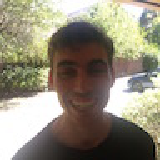

In [27]:
benoit = tf.keras.preprocessing.image.load_img('images/benoit.jpg', target_size=(160, 160))
img = np.around(np.array(benoit)/255.0, decimals=12)
print(img.shape)
benoit

In [28]:
def img_to_encoding(img_path, model):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(160, 160))
    img = np.array(img).astype('float32')
    img = np.around(img/255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)      # to batch shape
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [29]:
img_to_encoding('images/dan.jpg', model).shape

(1, 128)

In [30]:
database = {}

people = [
    ("danielle", "images/danielle.png"),
    ("younes", "images/younes.jpg"),
    ("tian", "images/tian.jpg"),
    ("andrew", "images/andrew.jpg"),
    ("kian", "images/kian.jpg"),
    ("dan", "images/dan.jpg"),
    ("sebastiano", "images/sebastiano.jpg"),
    ("bertrand", "images/bertrand.jpg"),
    ("kevin", "images/kevin.jpg"),
    ("felix", "images/felix.jpg"),
    ("benoit", "images/benoit.jpg"),
    ("arnaud", "images/arnaud.jpg")
]

for name, path in people:
    database[name] = img_to_encoding(path, model)

## Face Verification - `verify()`
This function performs face verification. It takes a new input image (img_path), extracts its face encoding using `img_to_encoding`, and compares it to a precomputed encoding of the claimed identity stored in the database.

It uses L2 distance (Euclidean norm) to measure similarity. If the distance is below a threshold (e.g. 0.7), it assumes the identity is correct and grants access.

In [31]:
def verify(img_path, identity, database, model):
    """Verifies if the person in the given image is who they claim to be"""
    
    img_encoding = img_to_encoding(img_path, model)
    dist = np.linalg.norm(img_encoding - database[identity])
    
    if dist < 0.7:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False 
    return dist, door_open

In [32]:
distance, door_open_flag = verify("images/camera_0.jpg", "younes", database, model)
distance, door_open_flag = verify("images/camera_1.jpg", "younes", database, model)
distance, door_open_flag = verify("images/camera_2.jpg", "benoit", database, model)
distance, door_open_flag = verify("images/camera_3.jpg", "younes", database, model)
distance, door_open_flag = verify("images/camera_3.jpg", "bertrand", database, model)
distance, door_open_flag = verify("images/camera_4.jpg", "kian", database, model)
distance, door_open_flag = verify("images/camera_5.jpg", "arnaud", database, model)

It's younes, welcome in!
It's not younes, please go away
It's benoit, welcome in!
It's not younes, please go away
It's bertrand, welcome in!
It's not kian, please go away
It's arnaud, welcome in!


## Face Recognition - `who_is_it()`

This function performs face recognition by:

* Encoding the face from a new input image (img_path)

* Comparing this encoding with all stored encodings in the database

* Finding the identity with the lowest L2 distance

If the smallest distance is greater than the threshold (e.g., 0.7), the face is considered unknown. Otherwise, it returns the closest matching identity.

In [33]:
def who_is_it(img_path, database, model):
    img_encoding = img_to_encoding(img_path, model)
    
    min_dist = 1000
    for (name, db_enc) in database.items():
        dist = np.linalg.norm(img_encoding - db_enc)
        if dist < min_dist:
            min_dist = dist
            identity = name
        
    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
    
    return min_dist, identity

In [34]:
_, _ = who_is_it("images/camera_0.jpg", database, model)    # "younes"
_, _ = who_is_it("images/camera_1.jpg", database, model)
_, _ = who_is_it("images/camera_2.jpg", database, model)
_, _ = who_is_it("images/camera_3.jpg", database, model)
_, _ = who_is_it("images/camera_4.jpg", database, model)
_, _ = who_is_it("images/camera_5.jpg", database, model)

it's younes, the distance is 0.5992949
it's bertrand, the distance is 0.54364836
it's benoit, the distance is 0.2783233
it's bertrand, the distance is 0.38616252
it's sebastiano, the distance is 0.40061313
it's arnaud, the distance is 0.37389043


In [35]:
_, _ = who_is_it("images/kevin.jpg", database, model)
_, _ = who_is_it("images/bertrand.jpg", database, model)
_, _ = who_is_it("images/dan.jpg", database, model)
_, _ = who_is_it("images/younes.jpg", database, model)
_, _ = who_is_it("images/benoit.jpg", database, model)
_, _ = who_is_it("images/felix.jpg", database, model)

it's kevin, the distance is 0.0
it's bertrand, the distance is 0.0
it's dan, the distance is 0.0
it's younes, the distance is 0.0
it's benoit, the distance is 0.0
it's felix, the distance is 0.0
